# Isolate Census Blocks
Imports county level block feature and attribute data. Queries for blocks with > 50% black tenants, selects features associated with those blocks, and writes them to a new files. 

In [7]:
import geopandas as gpd
import pandas as pd
%matplotlib inline

In [23]:
#Get spatial data
fc_WakeBlock = gpd.read_file('./data/spatial/tabblock2010_37183_pophu.shp')
fc_WakeBlock.dtypes

STATEFP10     object
COUNTYFP10    object
TRACTCE10     object
BLOCKCE       object
BLOCKID10     object
PARTFLG       object
HOUSING10      int64
POP10          int64
geometry      object
dtype: object

In [34]:
#Get the attribute data
df_P10 = pd.read_csv('./data/Census/aff_download/DEC_10_PL_P1_with_ann.csv',
                     skiprows=[1],
                     usecols=['GEO.id2','D001','D004'],
                     dtype={'GEO.id2':'str'}
                    )
df_P10.dtypes

GEO.id2    object
D001        int64
D004        int64
dtype: object

In [35]:
#Isolate blocks that are >= 50% black
df_P10['PctBlack'] = df_P10.D004 / df_P10.D001
df_B50 = df_P10[df_P10['PctBlack'] > 0.5]
df_B50.shape

(1391, 4)

In [37]:
#Join to spatial features
fc_SelBlocks = pd.merge(left=fc_WakeBlock,left_on='BLOCKID10',
                        right=df_B50,right_on='GEO.id2',
                        how='right')

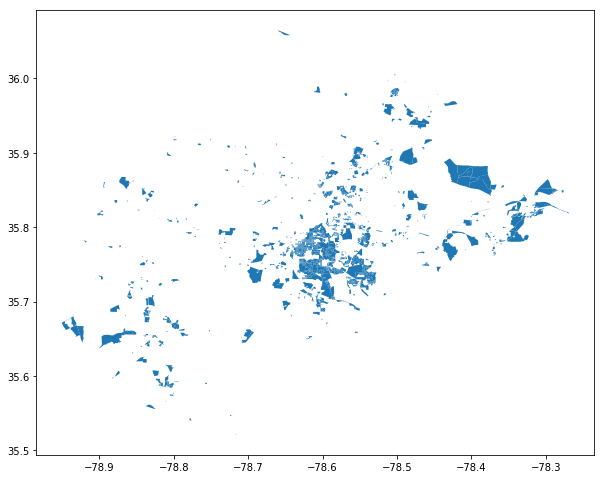

In [43]:
#View
fc_SelBlocks.plot(figsize=(10,10));

In [44]:
#Save
fc_SelBlocks.to_file('./data/spatial/tabblock2010_37183_BlackGT50Pct.shp',format='shapefile')